# Task 5 : Exploratory Data Analysis - Sports

# Author - Aatmaja Joshi

# @TSF GRIP TASKS

# Dataset link : https://bit.ly/34SRn3b

## Detail 
- Problem Statement: Perform Exploratory Data Analysis on 'Indian Premiere League'

- As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.

- Suggest teams or players a company should endorse for its products.

<img src = "https://images.hindustantimes.com/rf/image_size_960x540/HT/p2/2019/09/24/Pictures/file-photo-pakistan-cricket-world-cup-india_baa3875a-de87-11e9-93be-d8edb8f85faf.jpg">

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Loading first dataset

In [2]:
matches = pd.read_csv('matches.csv')

In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
matches.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [5]:
# Data Information
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [6]:
# checking the shape of the dataset
matches.shape

(756, 18)

In [7]:
# checkig the unique values in the dataset
matches.nunique()

id                 756
season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2             65
umpire3             25
dtype: int64

## Loading second dataset

In [8]:
deliveries = pd.read_csv('deliveries.csv')

In [9]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [10]:
deliveries.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [11]:
# Data Information
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [12]:
# checking the shape of the dataset
deliveries.shape

(179078, 21)

In [13]:
# checking the unique values in the dataset
deliveries.nunique()

match_id            756
inning                5
batting_team         15
bowling_team         15
over                 20
ball                  9
batsman             516
non_striker         511
bowler              405
is_super_over         2
wide_runs             6
bye_runs              5
legbye_runs           6
noball_runs           5
penalty_runs          2
batsman_runs          8
extra_runs            7
total_runs           10
player_dismissed    487
dismissal_kind        9
fielder             499
dtype: int64

## Now we will merge the two datasets

In [14]:
# merging the 2 datasets
merge = pd.merge(deliveries, matches, left_on = 'match_id', right_on = 'id')
merge.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [15]:
merge.to_csv('merged_data.csv', index=False)

In [16]:
merge.shape

(179078, 39)

In [17]:
# Summary statistics of merge data
merge.describe(include =  'all')

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,179078.000000,179078.000000,179078,179078,179078.000000,179078.000000,179078,179078,179078,179078.000000,...,179078,179078.000000,178706,179078.000000,179078.000000,178706,179078,178578,178578,28366
unique,NaN,NaN,15,15,NaN,NaN,516,511,405,NaN,...,3,NaN,15,NaN,NaN,226,41,61,65,25
top,NaN,NaN,Mumbai Indians,Mumbai Indians,NaN,NaN,V Kohli,SK Raina,Harbhajan Singh,NaN,...,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,Eden Gardens,HDPK Dharmasena,S Ravi,C Shamshuddin
freq,NaN,NaN,22619,22517,NaN,NaN,4211,4173,3451,NaN,...,176372,NaN,26305,NaN,NaN,4949,17991,17486,13727,2409
mean,1802.252957,1.482952,NaN,NaN,10.162488,3.615587,NaN,NaN,NaN,0.000452,...,NaN,0.017914,NaN,13.404036,3.261579,NaN,NaN,NaN,NaN,NaN
std,3472.322805,0.502074,NaN,NaN,5.677684,1.806966,NaN,NaN,NaN,0.021263,...,NaN,0.132639,NaN,23.261007,3.347033,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,0.000000,...,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,190.000000,1.000000,NaN,NaN,5.000000,2.000000,NaN,NaN,NaN,0.000000,...,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,379.000000,1.000000,NaN,NaN,10.000000,4.000000,NaN,NaN,NaN,0.000000,...,NaN,0.000000,NaN,0.000000,3.000000,NaN,NaN,NaN,NaN,NaN
75%,567.000000,2.000000,NaN,NaN,15.000000,5.000000,NaN,NaN,NaN,0.000000,...,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN


In [18]:
# checking the size of all dataset at once
print("============================================")
print("size of matches dataset : ",matches.shape )
print("============================================")
print("size of deliveries dataset : ",deliveries.shape )
print("============================================")
print("size of merge dataset : ",merge.shape )
print("============================================")

size of matches dataset :  (756, 18)
size of deliveries dataset :  (179078, 21)
size of merge dataset :  (179078, 39)


## Data Preprocessing

### 1. EDA of Matches dataset

In [19]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [20]:
# statistical analysis of matches dataset
matches.describe(include = 'all')

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,756.000000,756.000000,749,756,756,756,756,756,756,756.000000,752,756.000000,756.000000,752,756,754,754,119
unique,NaN,NaN,32,546,15,15,15,2,3,NaN,15,NaN,NaN,226,41,61,65,25
top,NaN,NaN,Mumbai,2011-04-17,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,Eden Gardens,HDPK Dharmasena,C Shamshuddin,Nitin Menon
freq,NaN,NaN,101,2,101,95,98,463,743,NaN,109,NaN,NaN,21,77,73,57,10
mean,1792.178571,2013.444444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025132,NaN,13.283069,3.350529,NaN,NaN,NaN,NaN,NaN
std,3464.478148,3.366895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156630,NaN,23.471144,3.387963,NaN,NaN,NaN,NaN,NaN
min,1.000000,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,189.750000,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,378.500000,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN
75%,567.250000,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN


### Handling Missing Values

In [21]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

- Columns "city", "winner", "player_of_match", "umpire1", "umpire2" have missing values.
- Here "umpire3" column has maximum number of missing value present. So we should delete that column from the dataframe.

In [22]:
matches.drop(['umpire3'],axis = 1, inplace = True)

In [23]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

### Handling missing values in "city" column

In [24]:
# find the venue name of all missing values of 'city'
matches[matches['city'].isnull()][['city','venue']]

,city,venue
461,NaN,Dubai International Cricket Stadium
462,NaN,Dubai International Cricket Stadium
466,NaN,Dubai International Cricket Stadium
468,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
474,NaN,Dubai International Cricket Stadium
476,NaN,Dubai International Cricket Stadium


- As all missing values are from "Dubai International Cricket Stadium". So we can fill the missing value by "Dubai"

In [25]:
matches['city'] = matches['city'].fillna('Dubai')

In [26]:
matches['city'].isnull().sum()

0

###  Handling Missing Values in "umpire1", "umpire2", "player_of_match" columns

#### In matches_df "player_of_match", "umpire1", and "umpire2" has 4,2,2 numbers of missing value. So we can delete these rows having missing values.

In [27]:
matches[(matches['umpire1'].isnull()) | (matches['umpire2'].isnull()) | (matches['player_of_match'].isnull())]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN


In [28]:
# delete rows having missing value in columns 'umpire1', 'umpire2', 'player_of_match'
matches.dropna(subset = ['umpire1', 'umpire2', 'player_of_match'], inplace = True)

In [29]:
matches.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [30]:
# shape of updated matches dataframe
matches.shape

(750, 17)

## EDA of deliveries dataset

In [31]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [32]:
# statistical analysis of deliveries dataset
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


### Handling missing values

In [33]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

- Here we can see column "player_dismissed", "dismissal_kind", "fielder" have maximum(more than 90%) number of missing value present.
- So we should delete these columns.

In [34]:
# drop columns "player_dismissed","dismissal_kind","fielder" from the DataFrame
deliveries.drop(columns = ['player_dismissed', 'dismissal_kind', 'fielder'], axis = 1, inplace = True)

In [35]:
deliveries.isnull().sum()

match_id         0
inning           0
batting_team     0
bowling_team     0
over             0
ball             0
batsman          0
non_striker      0
bowler           0
is_super_over    0
wide_runs        0
bye_runs         0
legbye_runs      0
noball_runs      0
penalty_runs     0
batsman_runs     0
extra_runs       0
total_runs       0
dtype: int64

### Now both the datasets are clean i.e there is no missing value present.

## 1. Number of teams participated in each season

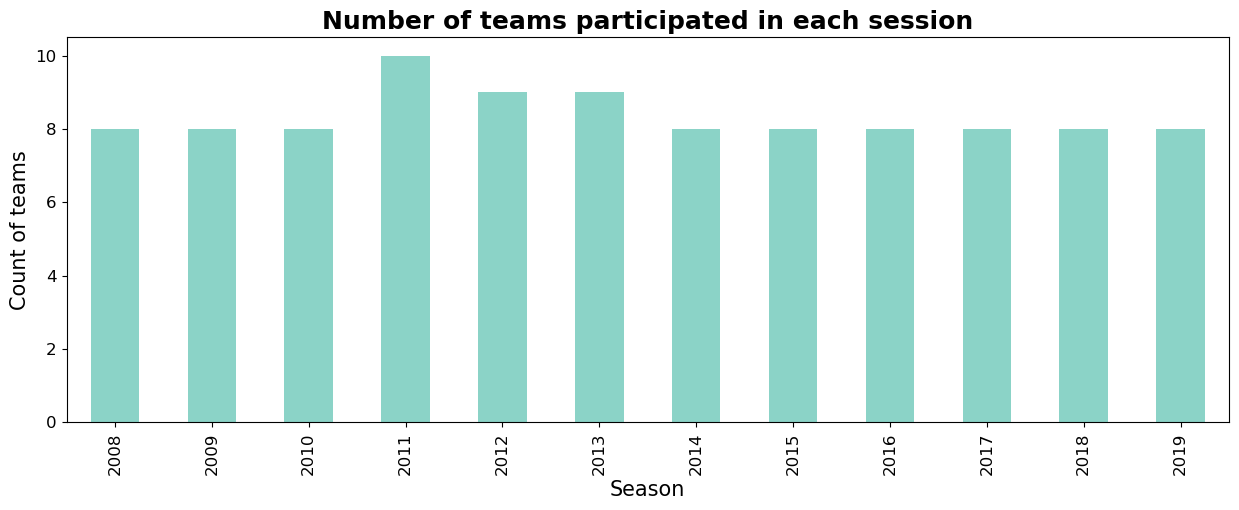

In [36]:
matches.groupby('season')['team1'].nunique().plot(kind = "bar", figsize = (15,5), color = "#8bd3c7")
plt.title('Number of teams participated in each session', fontsize = 18, fontweight = "bold")
plt.ylabel("Count of teams", fontsize = 15)
plt.xlabel("Season", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

- #### In the year of 2011, 2012, 2013, there were 10,9,9 teams participated while in other seasons participated teams were 8.

## 2. Number of Matches Played in Each Season

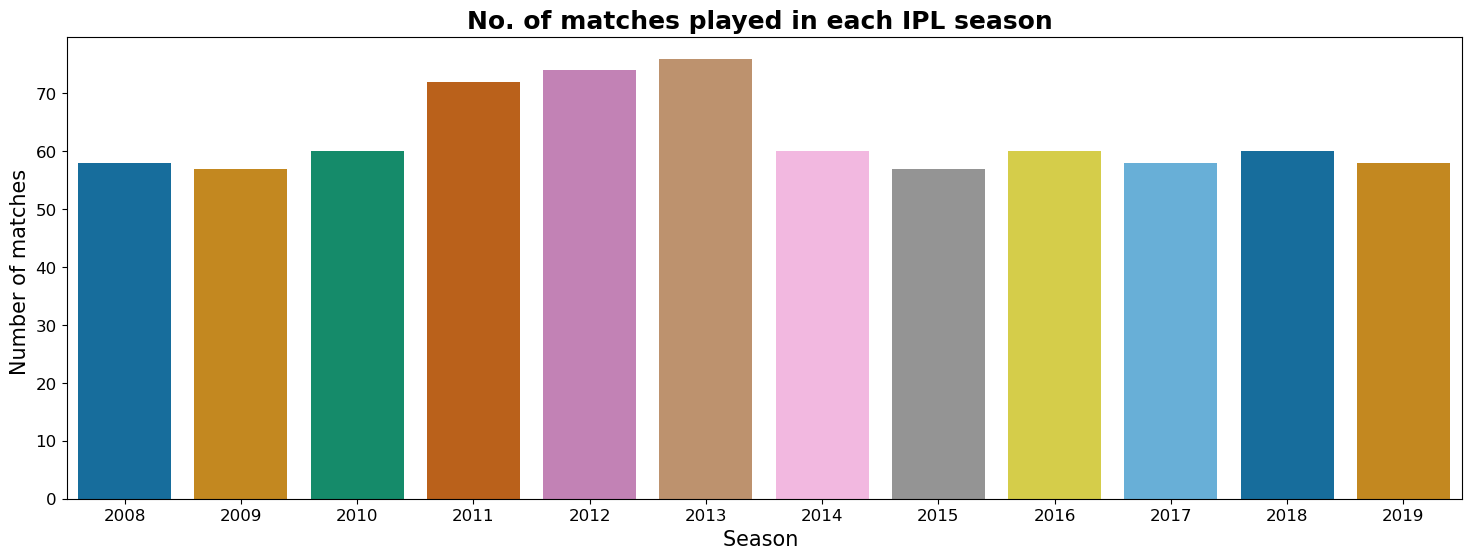

In [37]:
plt.figure(figsize = (18, 6))
sns.countplot(x = 'season', data = matches, palette = "colorblind")
plt.title("No. of matches played in each IPL season ", fontsize = 18, fontweight = "bold")
plt.ylabel("Number of matches ", fontsize = 15)
plt.xlabel("Season ", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

- #### In 2011, 2012 and 2013 most of the matches are played

## 3. Number of Matches won by team

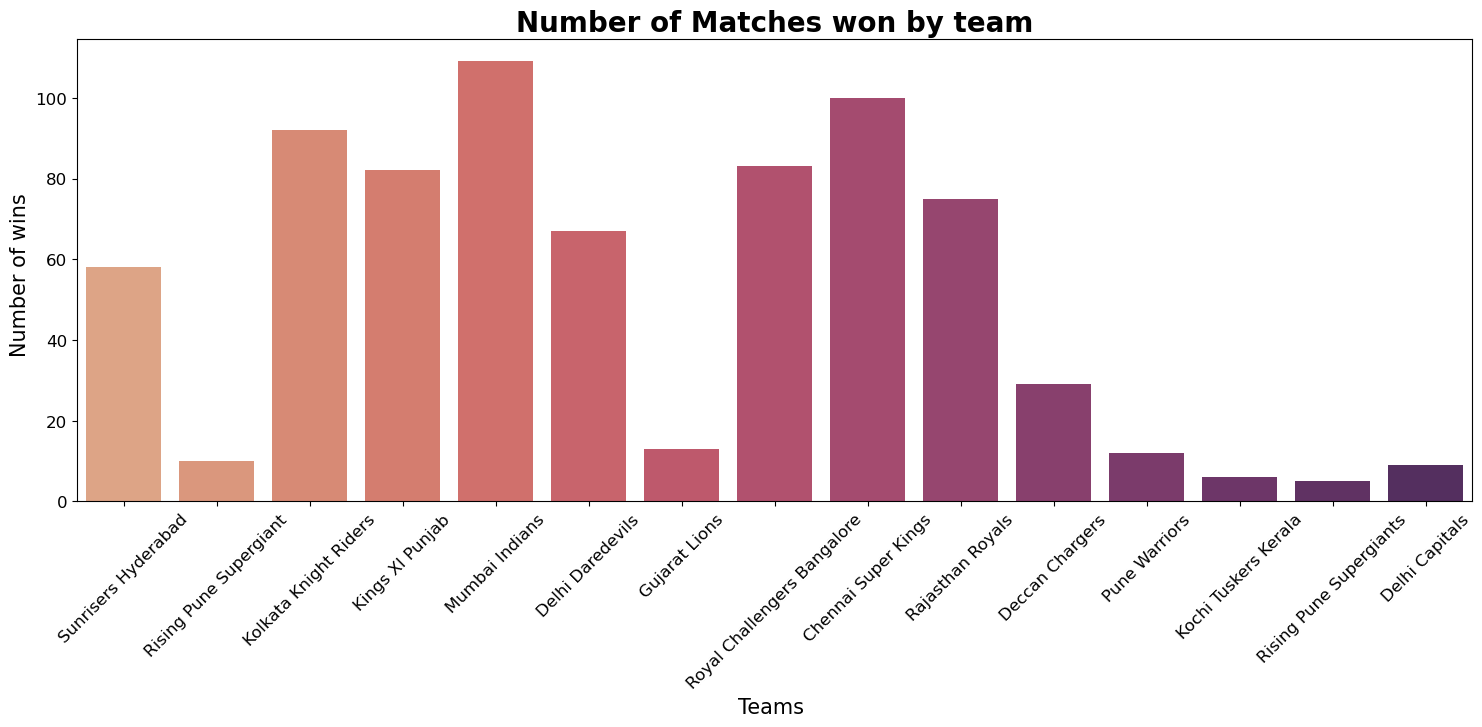

In [38]:
plt.figure(figsize = (18, 6))
shade = sns.color_palette("flare", n_colors = 15)
sns.countplot(x = 'winner', data = matches, palette=shade)
plt.ylabel("Number of wins ", fontsize = 15)
plt.xlabel("Teams ", fontsize = 15)
plt.title("Number of Matches won by team", fontsize = 20, fontweight = 'bold')
plt.xticks(fontsize = 12, rotation = 45)
plt.yticks(fontsize = 12)
plt.show()

- #### Mumbai Indians has maximum number of winning matches followed by Chennai Super Kings.

In [39]:
matches.nunique()

id                 750
season              12
city                33
date               543
team1               15
team2               15
toss_winner         15
toss_decision        2
result               2
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2             65
dtype: int64

- In matches_df DataFrame, "city" column has 33 unique values while "venue" column has 41 distinct values.
- Let's find out which city has many number of venues.

In [40]:
# find how many stadium present in each cities
city_venue = matches.groupby(['city', 'venue']).count()['season']
city_venue_df = pd.DataFrame(city_venue)
city_venue_df

season
city           venue                                                     
Abu Dhabi      Sheikh Zayed Stadium                                     7
Ahmedabad      Sardar Patel Stadium, Motera                            12
Bangalore      M Chinnaswamy Stadium                                   63
Bengaluru      M Chinnaswamy Stadium                                    7
               M. Chinnaswamy Stadium                                   6
Bloemfontein   OUTsurance Oval                                          2
Cape Town      Newlands                                                 7
Centurion      SuperSport Park                                         12
Chandigarh     Punjab Cricket Association IS Bindra Stadium, M...      11
               Punjab Cricket Association Stadium, Mohali              35
Chennai        M. A. Chidambaram Stadium                                8
               MA Chidambaram Stadium, Chepauk                         49
Cuttack        Barabati Stadium                                         7
Delhi          Feroz Shah Kotla                                        66
               Feroz Shah Kotla Ground                                  7
Dharamsala     Himachal Pradesh Cricket Association Stadium             9
Dubai          Dubai International Cricket Stadium                      7
Durban         Kingsmead                                               15
East London    Buffalo Park                                             3
Hyderabad      Rajiv Gandhi International Stadium, Uppal               56
               Rajiv Gandhi Intl. Cricket Stadium                       8
Indore         Holkar Cricket Stadium                                   9
Jaipur         Sawai Mansingh Stadium                                  47
Johannesburg   New Wanderers Stadium                                    8
Kanpur         Green Park                                               4
Kimberley      De Beers Diamond Oval                                    3
Kochi          Nehru Stadium                                            5
Kolkata        Eden Gardens                                            77
Mohali         IS Bindra Stadium                                        7
               Punjab Cricket Association IS Bindra Stadium, M...       3
Mumbai         Brabourne Stadium                                       11
               Dr DY Patil Sports Academy                              17
               Wankhede Stadium                                        73
Nagpur         Vidarbha Cricket Association Stadium, Jamtha             3
Port Elizabeth St George's Park                                         7
Pune           Maharashtra Cricket Association Stadium                 21
               Subrata Roy Sahara Stadium                              17
Raipur         Shaheed Veer Narayan Singh International Stadium         6
Rajkot         Saurashtra Cricket Association Stadium                  10
Ranchi         JSCA International Stadium Complex                       7
Sharjah        Sharjah Cricket Stadium                                  6
Visakhapatnam  ACA-VDCA Stadium                                         1
               Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...      11

- #### Mumbai is having the highest number of stadium venues

### 4. Venue which has hosted most number of IPL matches

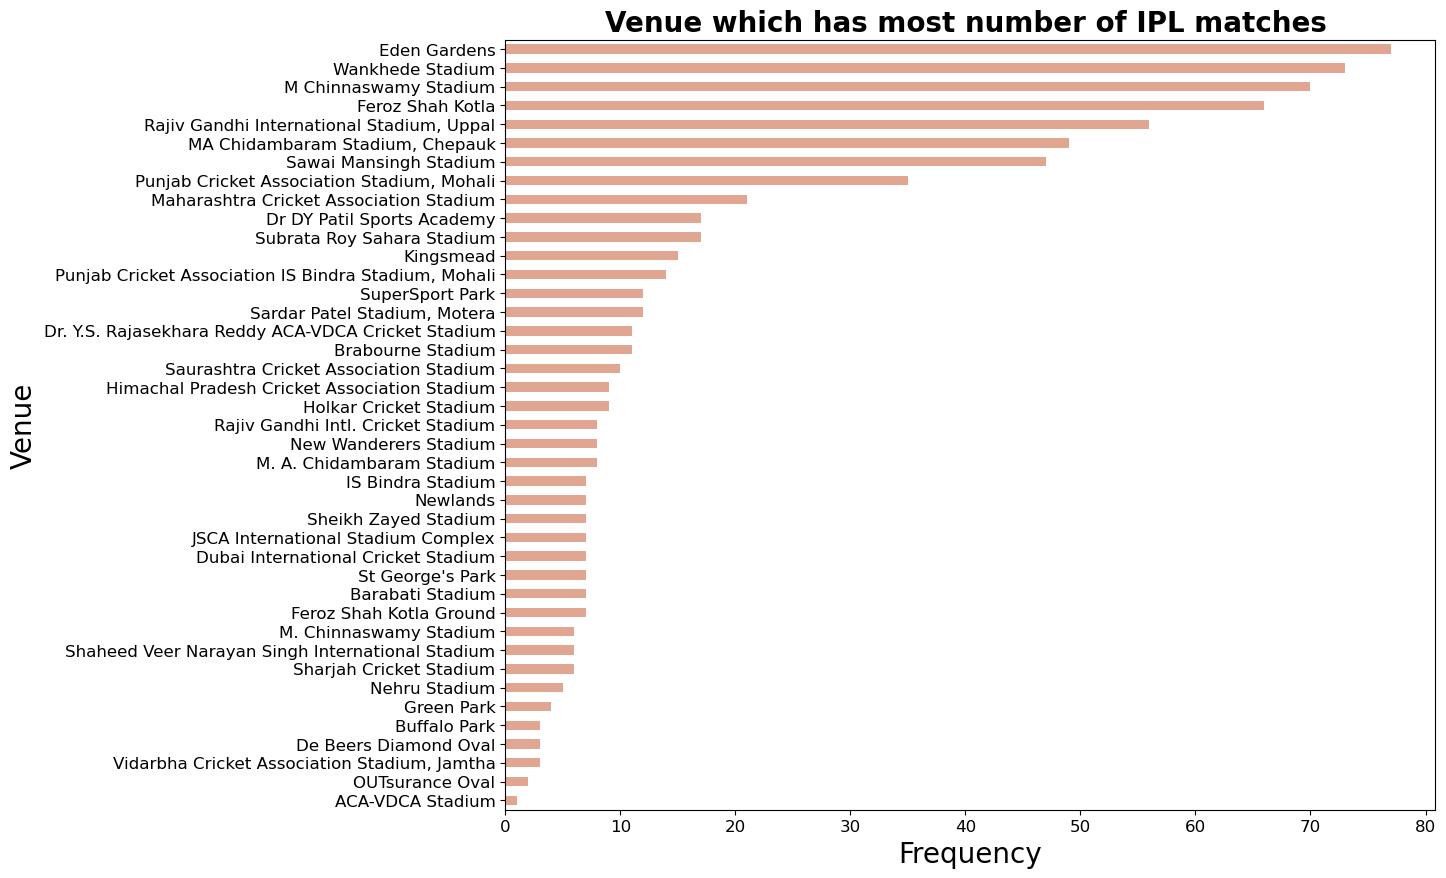

In [41]:
matches["venue"].value_counts().sort_values(ascending = True).plot(kind = "barh", figsize = (12, 10), fontsize = 15, color = "#e1a692")
plt.title("Venue which has most number of IPL matches ", fontsize = 20, fontweight = "bold")
plt.ylabel("Venue", size = 20)
plt.xlabel("Frequency", size = 20)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.show()

- #### "Eden Garden" followed by "Wankhede Stadium" has most number of IPL matches

## 5. Which Team has maximum number of win in IPL so far

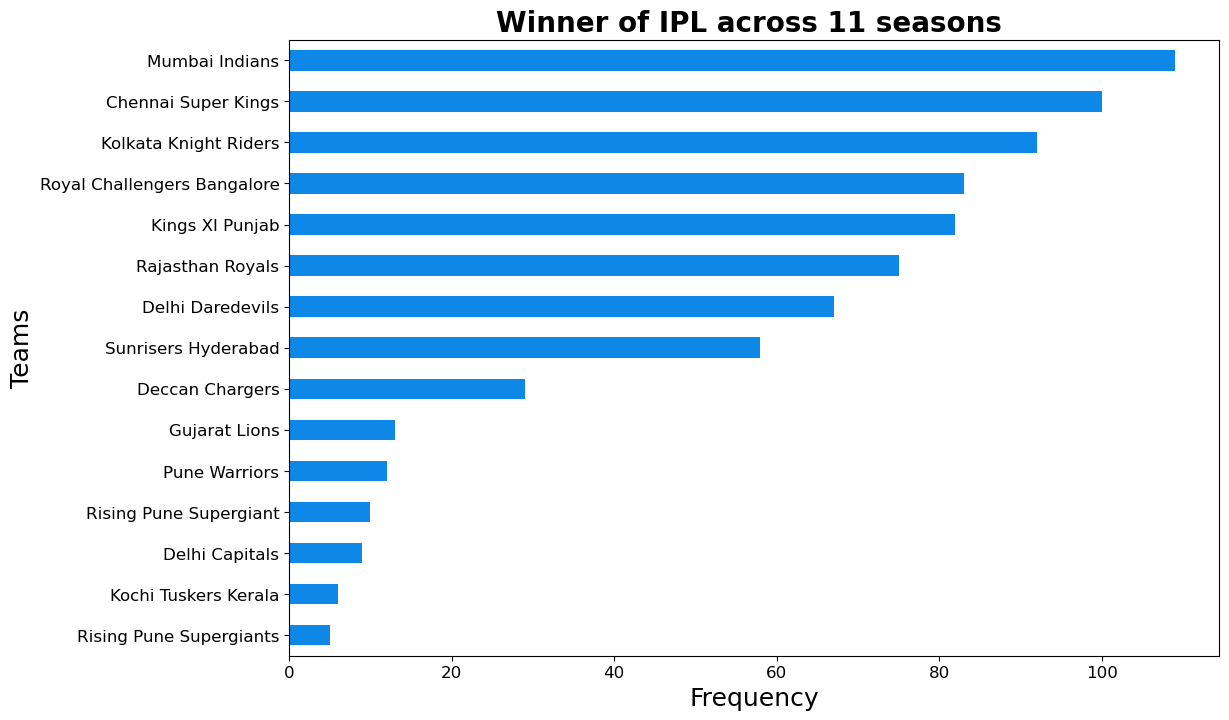

In [42]:
matches["winner"].value_counts().sort_values(ascending = True).plot(kind = "barh", figsize = (12, 8), fontsize = 15, color = "#0d88e6")
plt.title("Winner of IPL across 11 seasons ", fontsize = 20, fontweight = "bold")
plt.ylabel("Teams", size = 18)
plt.xlabel("Frequency", size = 18)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.show()

- #### "Mumbai Indians" team has maximum number of wins across 11 wins followed by "Chennai Super Kings"


##  6. Does teams choose to bat or field first, after winning toss 

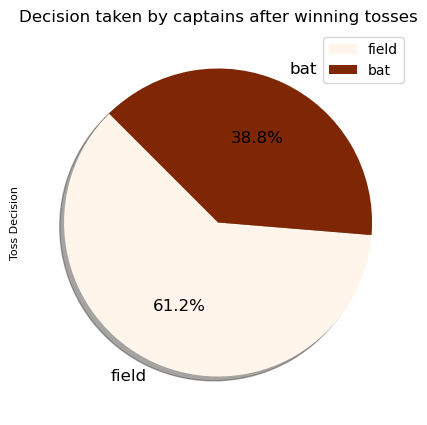

In [43]:
matches['toss_decision'].value_counts().plot(kind = "pie", figsize = (8, 5), fontsize = 12, autopct = "%1.1f%%", shadow = True, startangle = 135, legend = True, cmap = "Oranges")
plt.ylabel("Toss Decision", fontsize = 8)
plt.title("Decision taken by captains after winning tosses", fontsize = 12)
plt.show()

- #### Usually after winning the toss, team choose to field first.

## 7. How toss decision affects match results

#### create a column which store 'win' after taking decision of either "Field" or "Bat"

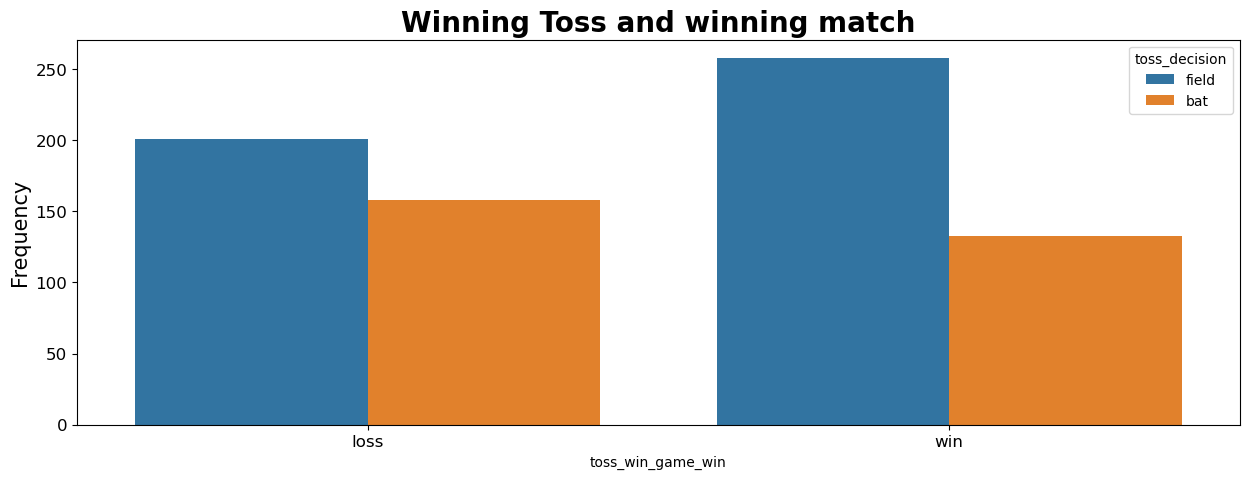

In [45]:
matches["toss_win_game_win"] = np.where((matches.toss_winner == matches.winner), 'win', 'loss')
plt.figure(figsize = (15, 5))
sns.countplot( x = "toss_win_game_win", data = matches, hue = "toss_decision")
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.title("Winning Toss and winning match", fontsize = 20, fontweight = "bold")
plt.ylabel("Frequency", fontsize = 15)
plt.show()

- #### After winning the toss the team who choose to field first has higher probability of winning the match.

## 8. Number of toss won by individual team

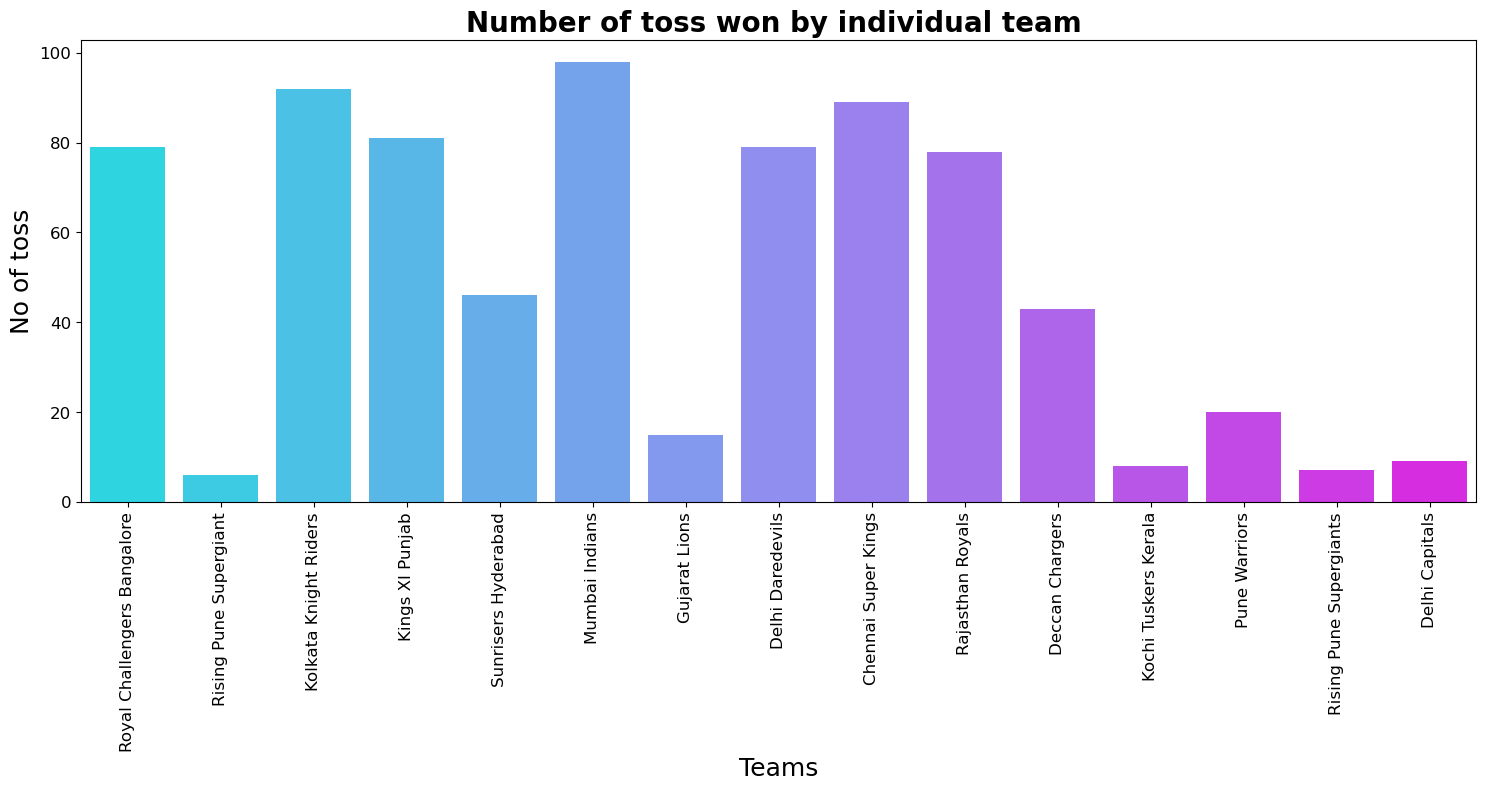

In [46]:
plt.figure(figsize = (18,6))
sns.countplot(x = 'toss_winner', data = matches, palette = 'cool')
plt.title("Number of toss won by individual team ", fontsize = 20, fontweight ="bold")
plt.xlabel("Teams", fontsize = 18)
plt.ylabel("No of toss", fontsize = 18)
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 12)
plt.show()

- #### Mumbai Indians has won the most toss

##  9. Individual teams decision to choose bat first or field first after winning toss

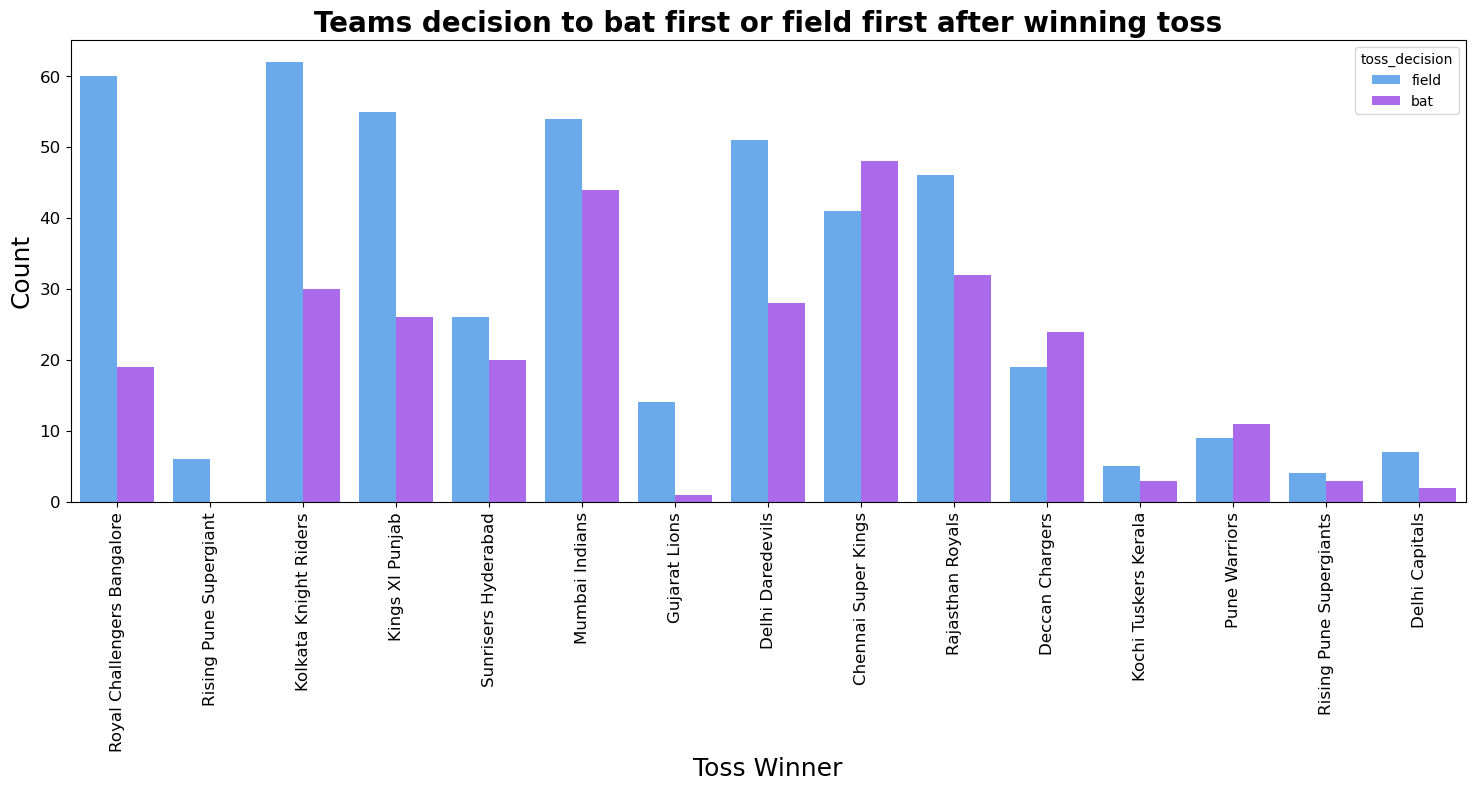

In [47]:
plt.figure(figsize = (18,6))
sns.countplot(x = 'toss_winner', data = matches, palette = 'cool', hue = 'toss_decision')
plt.title("Teams decision to bat first or field first after winning toss", fontsize = 20, fontweight ="bold")
plt.xlabel("Toss Winner", fontsize = 18)
plt.ylabel("Count", fontsize = 18)
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 12)
plt.show()

- #### Most of the teams choose to field first

## 10. Which player's performance has mostly led team's win

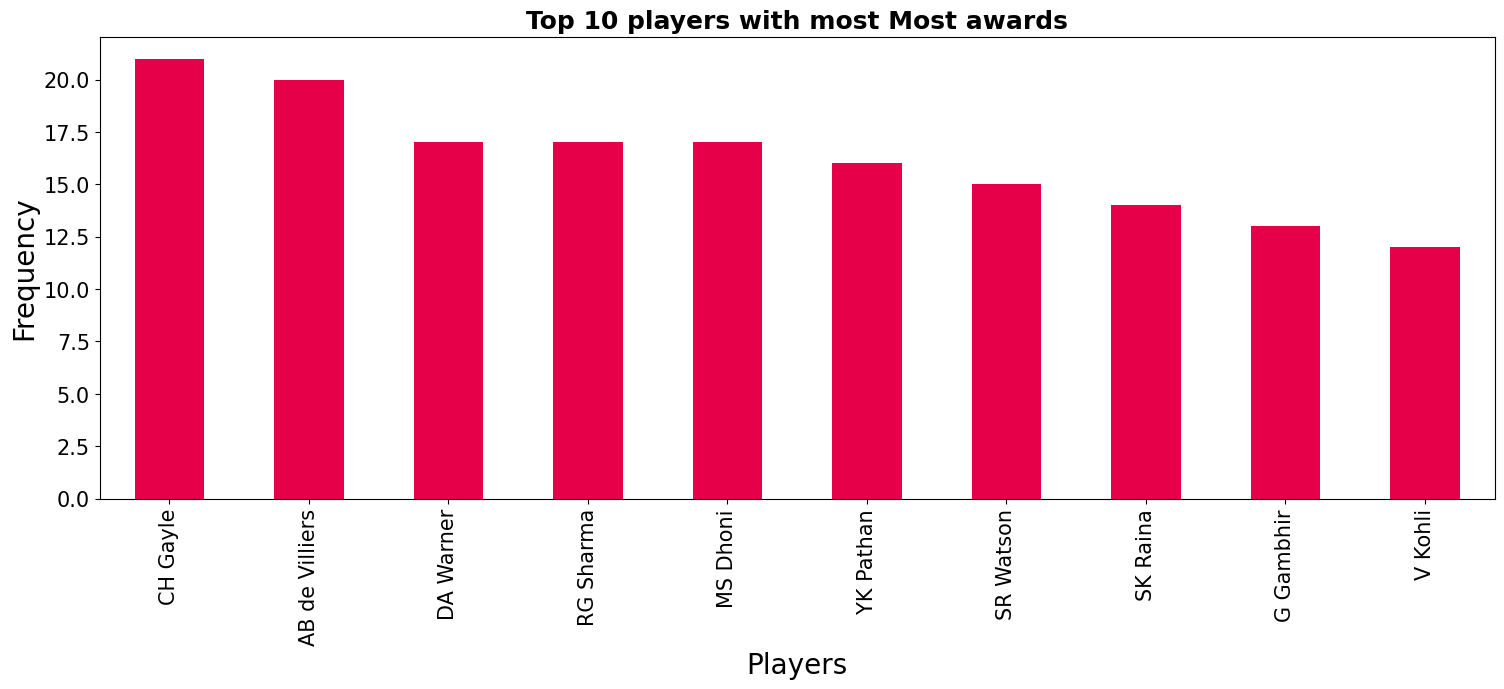

In [48]:
matches['player_of_match'].value_counts().head(10).plot(kind = "bar", figsize = (18, 6), fontsize = 15, color = "#e60049")
plt.title("Top 10 players with most Most awards",fontsize=18,fontweight="bold")
plt.ylabel("Frequency", fontsize = 20)
plt.xlabel("Players", fontsize = 20)
plt.show()

- #### CH Gayle is the most lead run scorer for the team followed by AB de Villiers.

## 11. Teams total scoring runs over the years

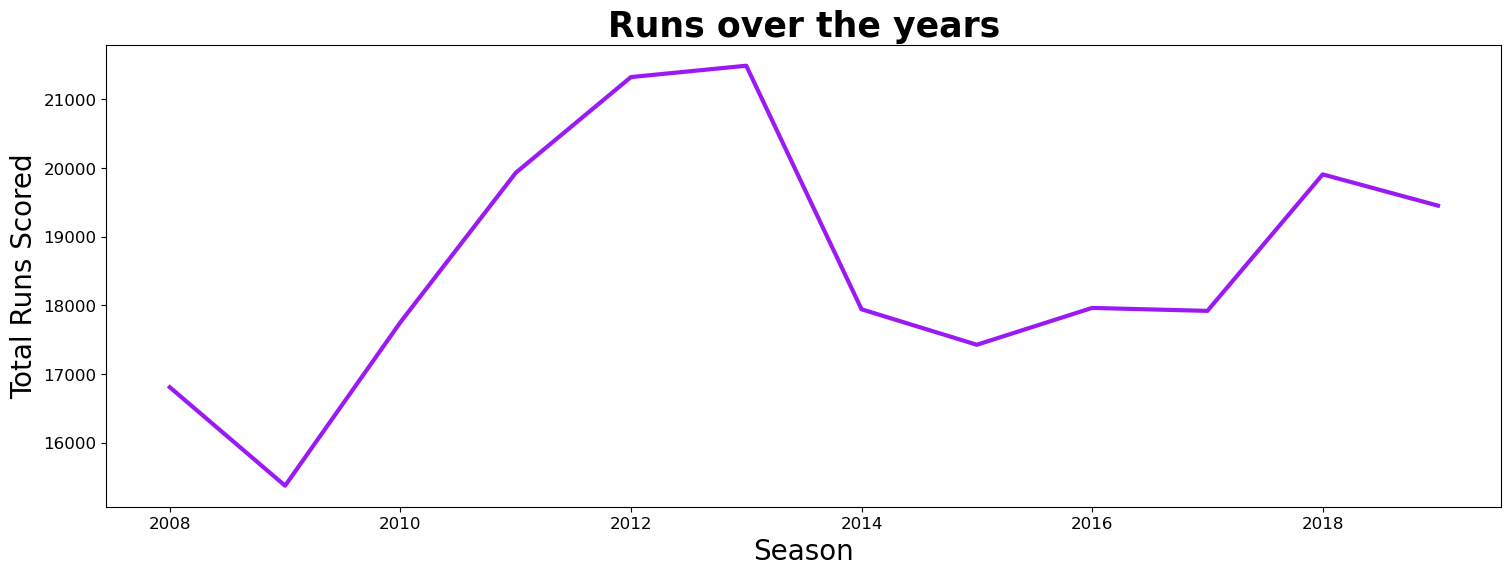

In [49]:
merge.groupby('season')['batsman_runs'].sum().plot(kind ='line', figsize = (18, 6), linewidth = 3, color = "#9b19f5")
plt.title("Runs over the years",fontsize= 25, fontweight = 'bold')
plt.xlabel("Season", size = 20)
plt.ylabel("Total Runs Scored", size = 20)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

- #### From IPL-2012 to IPl-2013 most runs were scored

##  12. Leading run-scorers in the IPL

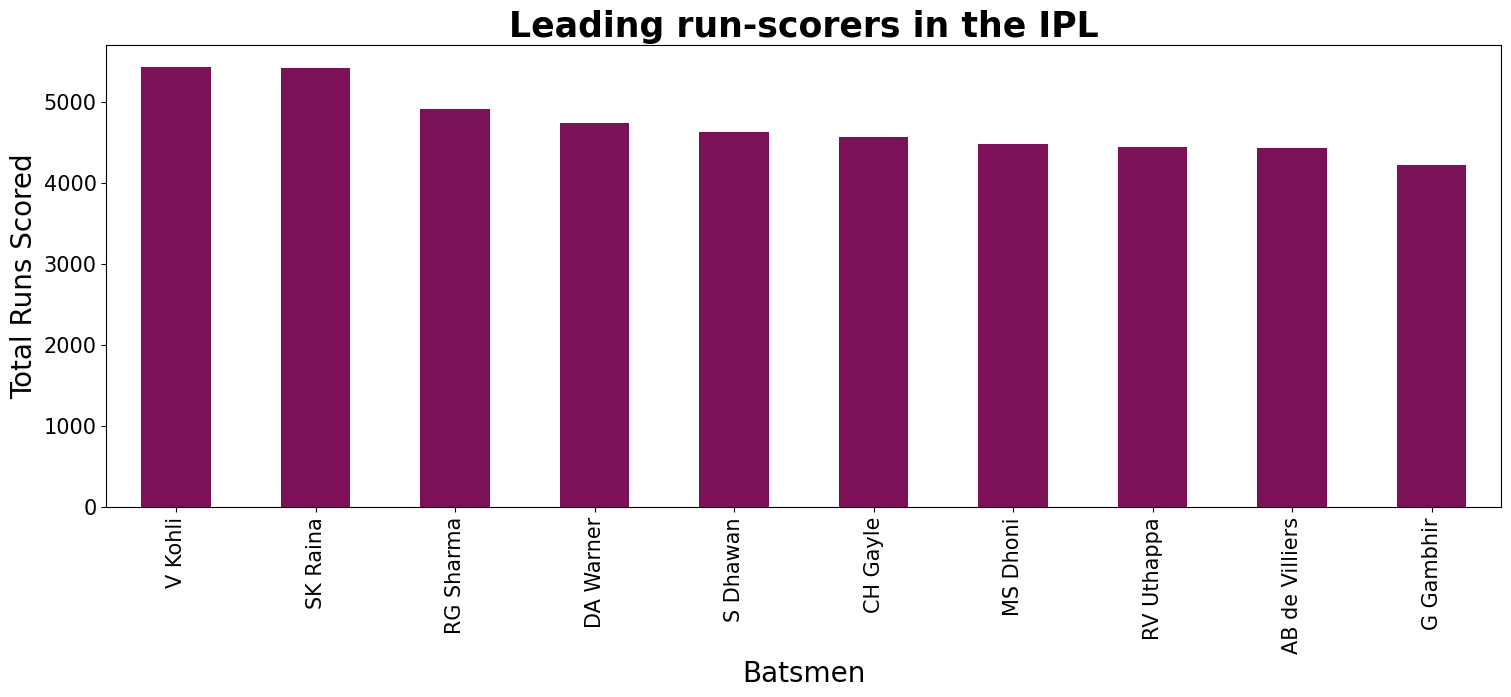

In [50]:
merge.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10).plot(kind = "bar", figsize = (18, 6), fontsize = 15, color = "#7c1158")
plt.title("Leading run-scorers in the IPL", fontsize = 25, fontweight = 'bold')
plt.xlabel("Batsmen", size = 20)
plt.ylabel("Total Runs Scored", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

- #### "Virat Kohli" followed by "SK Raina" is the top run getter of IPL in all over the seasons

## 13. Which batsman has been most consistent among top 10 run getters

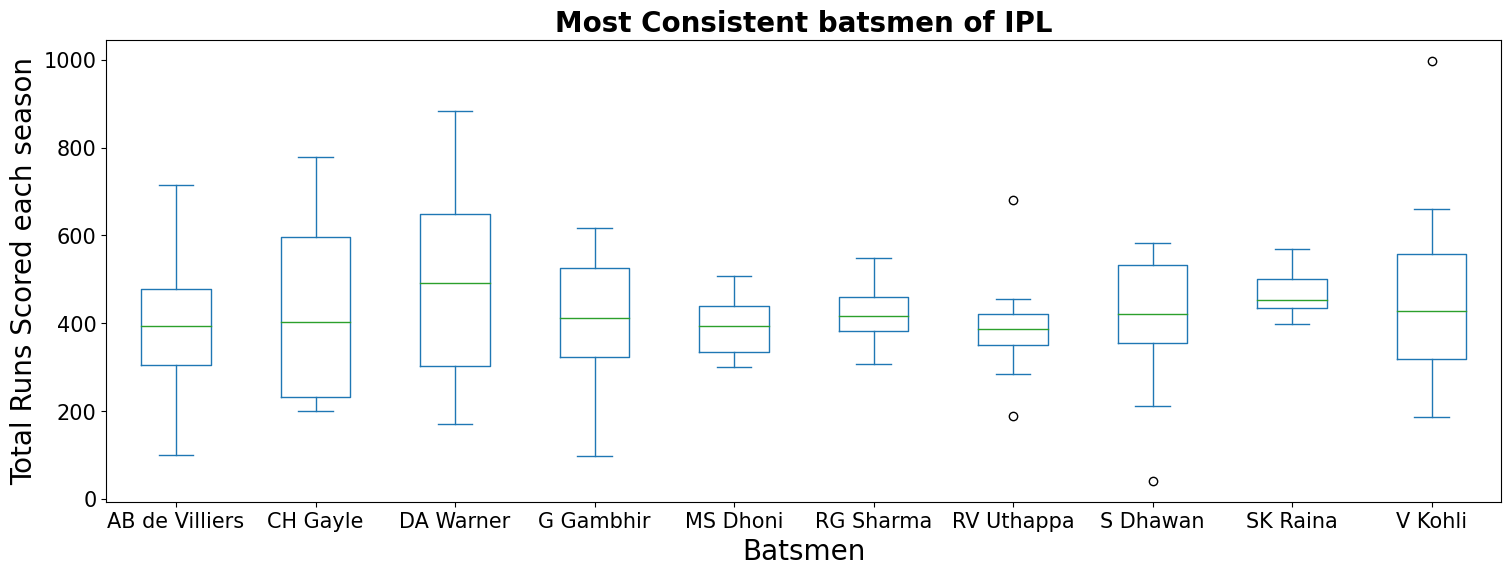

In [51]:
consistent_batsman = merge[merge.batsman.isin(['SK Raina', 'V Kohli','RG Sharma','G Gambhir','RV Uthappa', 'S Dhawan','CH Gayle', 'MS Dhoni',
'DA Warner', 'AB de Villiers'])][['batsman','season','total_runs']]
consistent_batsman.groupby(['season','batsman'])['total_runs'].sum().unstack().plot(kind = 'box', figsize = (18, 6))
plt.title("Most Consistent batsmen of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Batsmen", size = 20)
plt.ylabel("Total Runs Scored each season", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()


- #### "CH Gayle" and "DA Warner" are the most consistent batsmen of the IPL

## 14. Top Wicket Takers of IPL

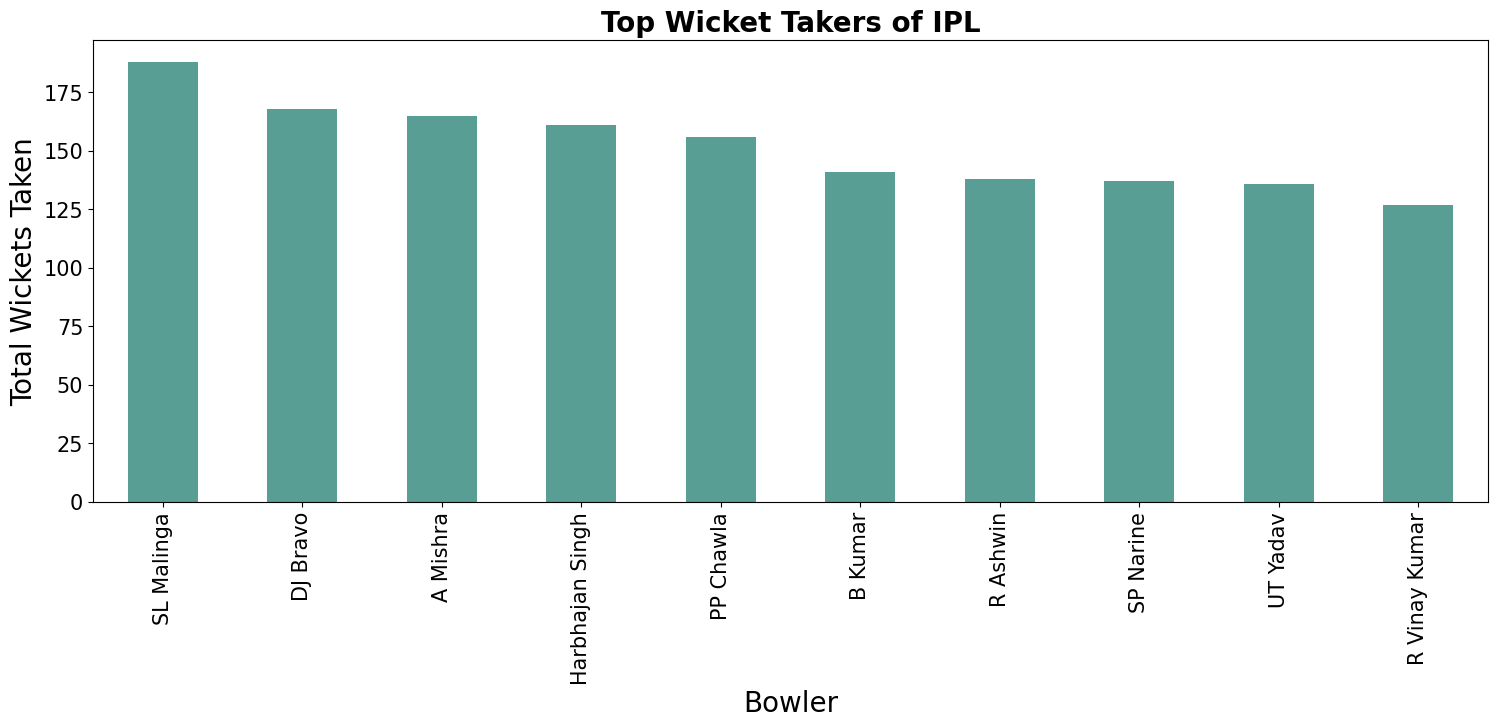

In [52]:
merge.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False).head(10).plot(kind = "bar", color = "#599e94", figsize = (18, 6))
plt.title("Top Wicket Takers of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Bowler", size = 20)
plt.ylabel("Total Wickets Taken", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

- #### SL Malinga is the top wicket taker of IPL

## 15. Batsmen with the best strike rates over the years

In [53]:
no_of_balls = pd.DataFrame(merge.groupby('batsman')['ball'].count())
runs = pd.DataFrame(merge.groupby('batsman')['batsman_runs'].sum())
seasons = pd.DataFrame(merge.groupby('batsman')['season'].nunique())

batsman_strike_rate = pd.DataFrame({'Balls':no_of_balls['ball'], 'Runs':runs['batsman_runs'], 'Seasons':seasons['season']})
batsman_strike_rate.reset_index(inplace = True)

batsman_strike_rate['strike_rate'] = batsman_strike_rate['Runs']/batsman_strike_rate['Balls'] * 100
highest_strike_rate = batsman_strike_rate[batsman_strike_rate.Seasons.isin([10, 11])][['Seasons', 'batsman', 'strike_rate']].sort_values(by = 'strike_rate', ascending = False)
highest_strike_rate.head(10)

,Seasons,batsman,strike_rate
92,11,CH Gayle,145.640370
213,10,KA Pollard,141.751527
112,10,DA Warner,139.523249
444,11,SR Watson,136.945813
72,11,BB McCullum,127.332746
449,10,STR Binny,126.000000
118,11,DJ Bravo,125.565801
514,11,Yuvraj Singh,125.283190
53,10,AT Rayudu,124.058187
147,11,G Gambhir,119.835414


## 16. Plotting highest strike rates in IPL

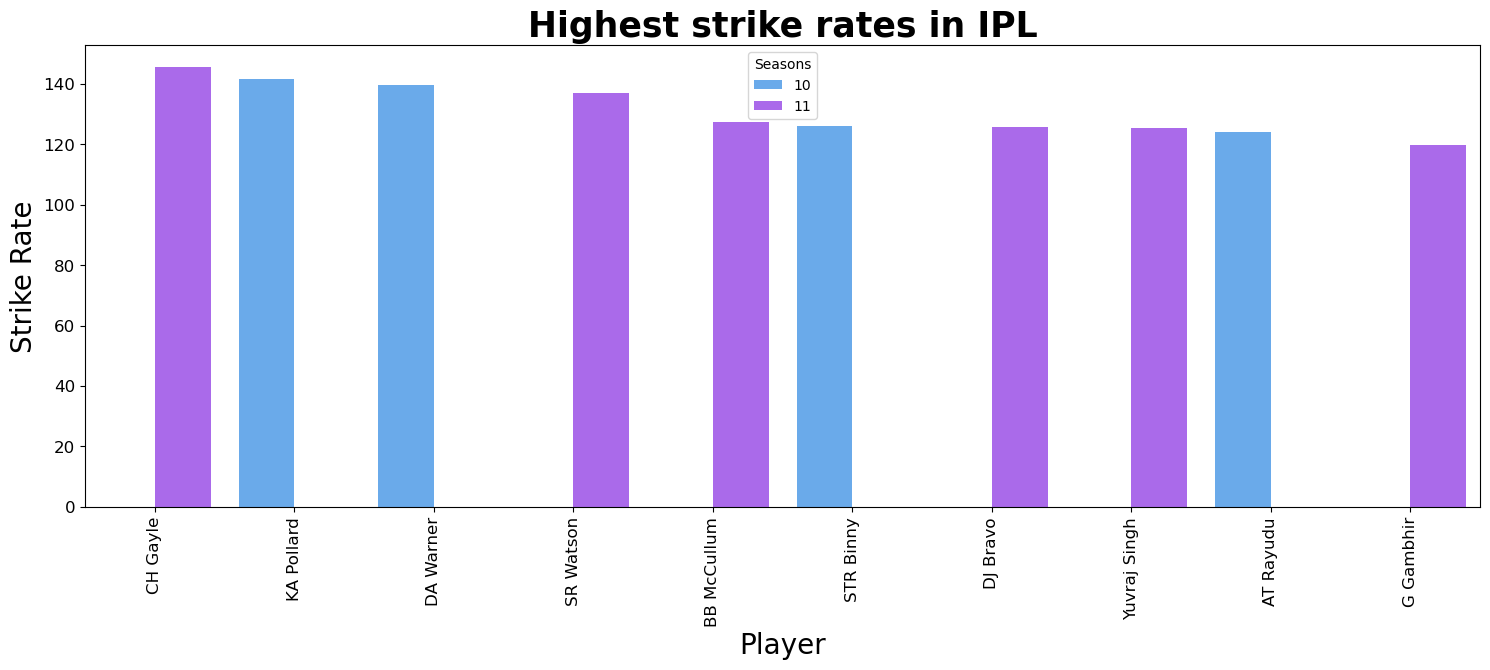

In [54]:
plt.figure(figsize = (18,6))
sns.barplot(x='batsman', y='strike_rate', data = highest_strike_rate.head(10), hue = 'Seasons',palette = 'cool')
plt.title("Highest strike rates in IPL",fontsize= 25, fontweight = 'bold')
plt.xlabel("Player", size = 20)
plt.ylabel("Strike Rate", size = 20)
plt.xticks(size = 12, rotation=90)
plt.yticks(size = 12)
plt.show()

## Interpretations

#### Q-1: As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.
<br>

- Mumbai Indians hold the record for being the most successful team in the IPL, having secured the highest number of victories and toss wins.
- Chasing has been the preferred strategy in the IPL, with 419 matches won by teams chasing a target compared to 350 matches won by teams defending a total.
- The largest victory margin when defending a total was by 146 runs, achieved by Mumbai Indians against Delhi Daredevils on 06 May 2017 at Feroz Shah Kotla stadium, Delhi.
- Chasing a target resulted in the most significant victories, with 11 instances of teams winning by 10 wickets without losing any wickets.
- Mumbai City has been the primary host of IPL matches, hosting the highest number of games.
- Chris Gayle holds the record for the most Player of the Match titles in the IPL.
- Eden Gardens has served as the venue for the highest number of IPL matches.
- Opting to field first after winning the toss has shown the highest probability of winning matches.

#### Q-2: Suggest teams or players a company should endorse for its products.

- For a franchise seeking a consistent run-scorer, consider options like V Kohli, S Raina, Rohit Sharma, and David Warner.
- Franchises aiming for game-changing batting performances should consider players such as Chris Gayle, AB deVillers, R Sharma, and MS Dhoni.
- If consistent run-scoring in every match is the priority, then players like DA Warner, CH Gayle, V Kohli, AB de Villiers, and S Dhawan are recommended.
- For the best finishers in the lower order with a high strike rate, options include CH Gayle, KA Pollard, DA Warner, SR Watson, and BB McCullum.
- Franchises in need of experienced bowlers may consider Harbhajan Singh, A Mishra, PP Chawla, R Ashwin, SL Malinga, and DJ Bravo.
- To bolster the bowling attack with wicket-taking abilities, focus on players like SL Malinga, DJ Bravo, A Mishra, Harbhajan Singh, and PP Chawla.
- For bowlers adept at bowling dot balls consistently, consider Harbhajan Singh, SL Malinga, B Kumar, A Mishra, and PP Chawla.
- Franchises looking for bowlers with good economy rates should target DW Steyn, M Muralitharan, R Ashwin, SP Narine, and Harbhajan Singh.